In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from copy import deepcopy
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


from mlxtend.plotting import plot_decision_regions

from neural_network import *

%matplotlib inline

## Atividade 1
#### Grupo: 

### UTILS

In [16]:
def __softmax(x):
    exp = np.exp(x)
    return exp / np.sum(exp, axis=1, keepdims=True)

def __compute_meshgrid(x, y):
    x_min, x_max, y_min, y_max = x[:, 0].min(), x[:, 0].max(), x[:, 1].min(), x[:, 1].max()
    x1, x2 = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T
    return x1, x2, x_mesh

def classification_predictions(x, y, is_binary, nn=None, threshold=0.0, figsize=(12,6), s=15, cmap=plt.cm.viridis):
    plt.figure(figsize=figsize)
    ax = plt.subplot(1, 2, 1)
    plt.scatter(x[:, 0], x[:, 1], c=list(np.array(y).ravel()), s=s, cmap=cmap)

    if nn is not None:
        plt.subplot(1, 2, 2, sharex=ax, sharey=ax)

        x1, x2, x_mesh = __compute_meshgrid(x, y)
        y_mesh = nn.predict(x_mesh)
        y_mesh = np.where(y_mesh <= threshold, 0, 1) if is_binary else np.argmax(__softmax(y_mesh), axis=1)

        plt.scatter(x[:, 0], x[:, 1], c=list(np.array(y).ravel()), s=s, cmap=cmap)
        plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap=cmap, alpha=0.5)

        
def make_log10(n_samples, x_min, x_max, noise=0.0, random_state=None):
    np.random.seed(random_state)
    x = np.logspace(np.log10(x_min), np.log10(x_max), n_samples)
    y = np.log10(x) + 2*noise*np.random.random(n_samples) - noise
    return x.reshape(-1,1), y.reshape(-1,1)

### Questão 1

##### utilizando one-hot encoding para a classificação
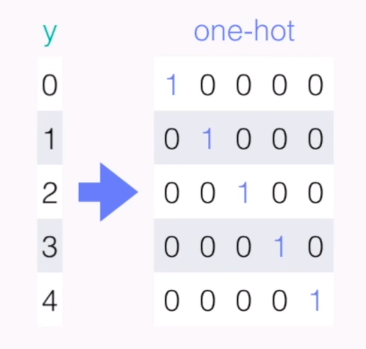

- colocando 1 e separando em diferentes conjuntos para cada classificação


In [32]:
x = np.array([[0,0,0], [0,0,1], [0,1,0], [0,1,1], [1,0,0], [1,0,1], [1,1,0],[1,1,1]])
y = np.array([[1,-1,-1,-1,-1,-1,-1,-1],
            [-1,1,-1,-1,-1,-1,-1,-1],
            [-1,-1,1,-1,-1,-1,-1,-1]
            ,[-1,-1,-1,1,-1,-1,-1,-1]
            ,[-1,-1,-1,-1,1,-1,-1,-1]
            ,[-1,-1,-1,-1,-1,1,-1,-1]
            ,[-1,-1,-1,-1,-1,-1,1,-1]
            ,[-1,-1,-1,-1,-1,-1,-1,1]]
            ).T


print(x.shape, y.shape)

(8, 3) (8, 8)


In [33]:
classes = [ i for i in range(x.shape[0])] # para organizar e colocar cada um em uma classe
classes

[0, 1, 2, 3, 4, 5, 6, 7]

In [34]:
data = pd.DataFrame(np.column_stack((x,classes)), columns=['x1','x2','x3','class'])
data

,x1,x2,x3,class
0,0,0,0,0
1,0,0,1,1
2,0,1,0,2
3,0,1,1,3
4,1,0,0,4
5,1,0,1,5
6,1,1,0,6
7,1,1,1,7


In [35]:
def gerar_dados(quantidade, base):
    dados_gerados = deepcopy(base)
    valores = dados_gerados[['x1','x2','x3']].values
    
    for i in range(quantidade):
        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(x.shape[0]*x.shape[1])]).reshape(8,3)
        novos_valores = valores + ruido
        for k in range(len(novos_valores)):
            #adicionando novos dados no final do dataset com o ruido
            dados_gerados.loc[len(dados_gerados)] = [novos_valores[k][0],novos_valores[k][1],novos_valores[k][2],k]
            
    return dados_gerados

In [36]:
dados_novos = gerar_dados(500,data)
dados_novos

,x1,x2,x3,class
0,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,1.000000,1.0
2,0.000000,1.000000,0.000000,2.0
3,0.000000,1.000000,1.000000,3.0
4,1.000000,0.000000,0.000000,4.0
...,...,...,...,...
4003,0.022999,0.964288,0.949200,3.0
4004,1.021027,-0.054375,0.099655,4.0
4005,0.999161,-0.099565,0.992798,5.0
4006,1.065462,1.074686,0.077393,6.0


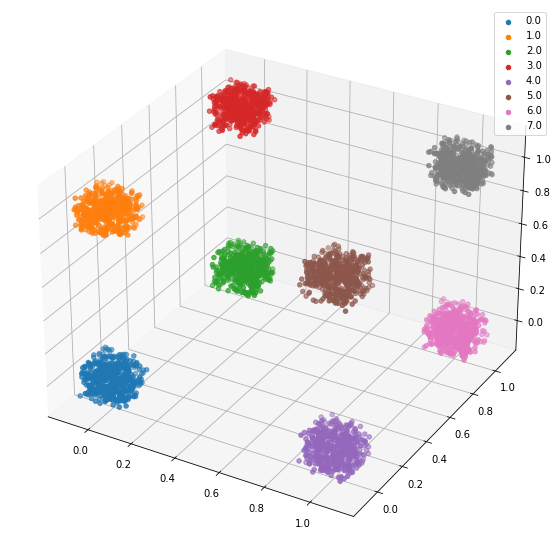

In [8]:
classes = dados_novos['class'].unique()

figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111, projection='3d')

for classe in classes:
    valores =  dados_novos[dados_novos['class'] == classe].values
    x = valores[:,0]
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(x,y,z, label=classe)
    
axis.legend()

In [10]:
# separando dados
X = dados_novos[['x1','x2','x3']].values
y = dados_novos[['class']].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3)
X_train.shape, X_test.shape

((2805, 3), (1203, 3))

In [11]:
# perceptron do sklearning
model = Perceptron()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [12]:
print('Reporte: \n')
print(classification_report(y_test,y_pred))


Reporte: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       155
         1.0       1.00      1.00      1.00       149
         2.0       1.00      1.00      1.00       164
         3.0       1.00      1.00      1.00       145
         4.0       1.00      1.00      1.00       159
         5.0       1.00      1.00      1.00       144
         6.0       1.00      1.00      1.00       146
         7.0       1.00      1.00      1.00       141

    accuracy                           1.00      1203
   macro avg       1.00      1.00      1.00      1203
weighted avg       1.00      1.00      1.00      1203



In [13]:
# perceptron implementado

w = np.random.randn(8 , X.shape[1]) # [8x3] 8 caracteristica para 3 colunas de entrada
learning_rate = 1e-3

for step in range(201):
    cost = 0
    for x_n, y_n in zip(X_train,y_train):
        y_pred = np.dot(x_n,w.T)
        y_pred = np.argmax(y_pred)
        error = y_n - y_pred
        #atualizar os pesos, se ele errou, quando y_n é diferente de y_pred (por isso atualizar os pesos nas posições respectivas)
        if not (y_n == y_pred):
            w[int(y_n)] +=  learning_rate* x_n # adiciona importancia a entrada
            w[int(y_pred)] -=  learning_rate* x_n #  diminui a importancia pois errou 

        cost += error**2
    if step % 10 == 0:
        print('epoch: {0}/{1} loss_train: {2:.4f}'.format(step,200,0.5*(cost/(len(X_train)))))

print('w: ',w)


epoch: 0/200 loss_train: 6.8900
epoch: 10/200 loss_train: 0.5200
epoch: 20/200 loss_train: 0.5362
epoch: 30/200 loss_train: 0.5478
epoch: 40/200 loss_train: 0.5520
epoch: 50/200 loss_train: 0.5554
epoch: 60/200 loss_train: 0.5601
epoch: 70/200 loss_train: 0.5636
epoch: 80/200 loss_train: 0.5772
epoch: 90/200 loss_train: 0.5831
epoch: 100/200 loss_train: 0.5756
epoch: 110/200 loss_train: 0.5897
epoch: 120/200 loss_train: 0.5914
epoch: 130/200 loss_train: 0.5922
epoch: 140/200 loss_train: 0.5852
epoch: 150/200 loss_train: 0.5904
epoch: 160/200 loss_train: 0.5966
epoch: 170/200 loss_train: 0.5952
epoch: 180/200 loss_train: 0.6009
epoch: 190/200 loss_train: 0.6029
epoch: 200/200 loss_train: 0.5966
w:  [[ 0.80948076 -0.10913331  0.33910476]
 [ 0.11935622 -0.40898229  1.08157223]
 [ 0.60948655  0.02487504  0.54408938]
 [ 0.11917634 -0.40756046  1.08033578]
 [ 0.87990952 -0.18750967  0.44564041]
 [ 0.8644131  -0.07646614  0.50207715]
 [ 0.86333034 -0.02941697  0.43457897]
 [ 0.82742639 -0.006

### Questão 2

#### A) Porta XOR

In [99]:
def gerar_dados_xor(quantidade, base):
    dados_gerados = deepcopy(base)
    valores = dados_gerados[['x0','x1']].values
    
    for i in range(quantidade):
        ruido = np.array([np.random.uniform(-0.1,0.1) for i in range(x.shape[0]*x.shape[1])]).reshape(4,2)
        novos_valores = valores + ruido
        for k in range(len(novos_valores)):
            #adicionando novos dados no final do dataset com o ruido
            if (k == 2):
                dados_gerados.loc[len(dados_gerados)] = [novos_valores[k][0],novos_valores[k][1],1]
            elif (k == 3):
                dados_gerados.loc[len(dados_gerados)] = [novos_valores[k][0],novos_valores[k][1],0]
            else:
                dados_gerados.loc[len(dados_gerados)] = [novos_valores[k][0],novos_valores[k][1],k]
            
            
    return dados_gerados

(4, 2) (4, 1)


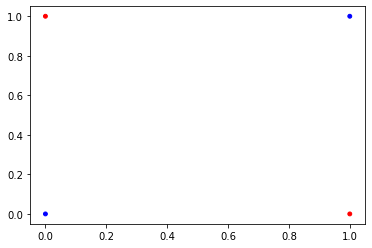

In [100]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0]).reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=list(np.array(y).ravel()), s=15, cmap='bwr')

In [101]:
data  = pd.DataFrame(np.column_stack((x,y)), columns=["x0","x1","y"])
data

,x0,x1,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [102]:
novos_dados = gerar_dados_xor(500, data)


In [103]:
novos_dados

,x0,x1,y
0,0.000000,0.000000,0.0
1,0.000000,1.000000,1.0
2,1.000000,0.000000,1.0
3,1.000000,1.000000,0.0
4,0.095556,0.074930,0.0
...,...,...,...
1999,1.020336,1.085810,0.0
2000,-0.055307,0.028610,0.0
2001,-0.042583,1.011201,1.0
2002,1.066665,-0.020933,1.0


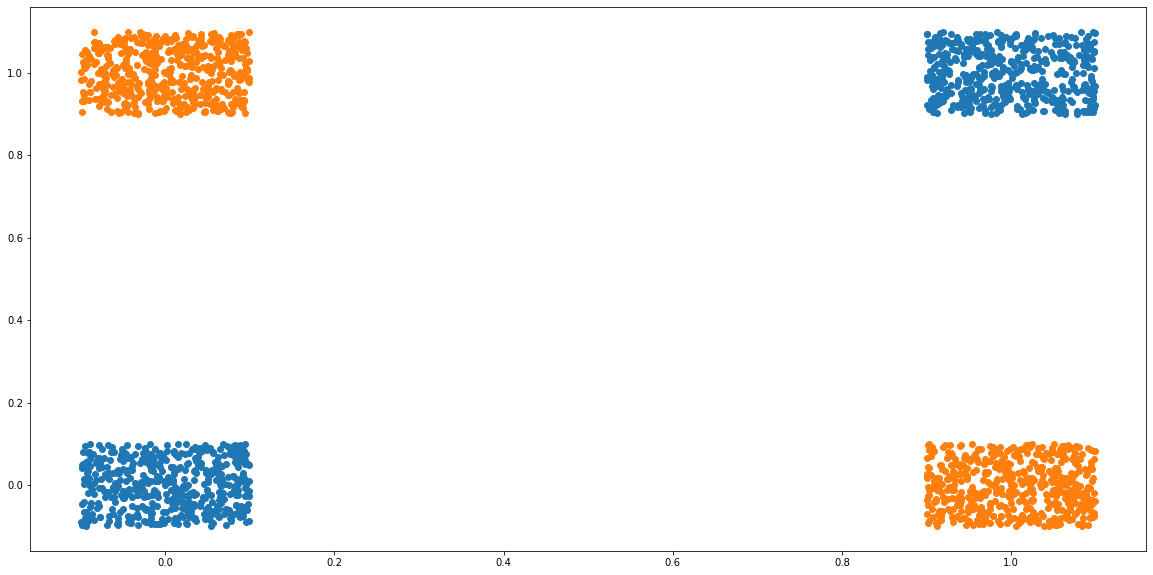

In [104]:
classes = novos_dados['y'].unique()

figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  novos_dados[novos_dados['y'] == classe].values
    x = valores[:,0]
    y = valores[:,1]
    axis.scatter(x,y, label=classe)
    


In [112]:
x = novos_dados[["x0","x1"]].values
y = novos_dados[["y"]].values

epoch:    0/3000 loss_train: 1.15777195
epoch:  300/3000 loss_train: 0.63307210
epoch:  600/3000 loss_train: 0.54214607
epoch:  900/3000 loss_train: 0.41779128
epoch: 1200/3000 loss_train: 0.28790941
epoch: 1500/3000 loss_train: 0.19095361
epoch: 1800/3000 loss_train: 0.13068828
epoch: 2100/3000 loss_train: 0.09438939
epoch: 2400/3000 loss_train: 0.07170880
epoch: 2700/3000 loss_train: 0.05677352
epoch: 3000/3000 loss_train: 0.04643610
Predições:
[[0.02467337]
 [0.95461293]
 [0.96117903]
 ...
 [0.96312814]
 [0.97086852]
 [0.05157097]]
Acurácia: 100.00%


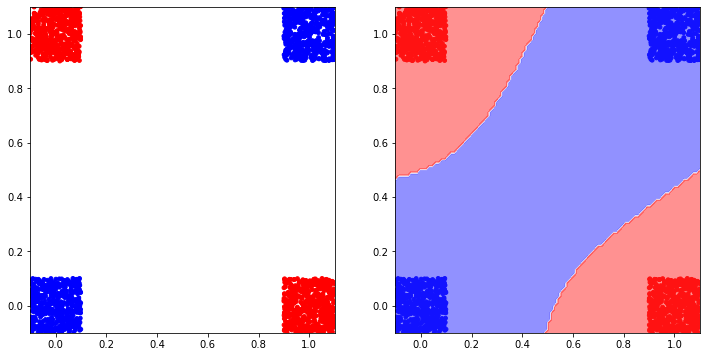

In [118]:
input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = binary_cross_entropy, learning_rate= 1e-1)
nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation=sigmoid))
nn.layers.append(Layer(input_dim=10, output_dim=output_dim, activation=sigmoid))

nn.fit(x,y, epochs=3000, verbose=300)

y_pred = nn.predict(x)
print('Predições:', y_pred, sep='\n')
print('Acurácia: {:.2f}%'.format(100*accuracy_score(y, y_pred > 0.5)))

classification_predictions(x, y, is_binary=True, threshold=0.5, nn=nn, cmap='bwr')

#### B) Log10

In [132]:
x,y = make_log10(100, 1, 10, noise=0, random_state=None)

In [133]:
# normalizar os dados
minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.astype(np.float64))

epoch:    0/3000 loss_train: 10.17959895
epoch:  300/3000 loss_train: 0.00948168
epoch:  600/3000 loss_train: 0.00225424
epoch:  900/3000 loss_train: 0.00078000
epoch: 1200/3000 loss_train: 0.00045847
epoch: 1500/3000 loss_train: 0.00038072
epoch: 1800/3000 loss_train: 0.00035687
epoch: 2100/3000 loss_train: 0.00034587
epoch: 2400/3000 loss_train: 0.00033847
epoch: 2700/3000 loss_train: 0.00033237
epoch: 3000/3000 loss_train: 0.00032692


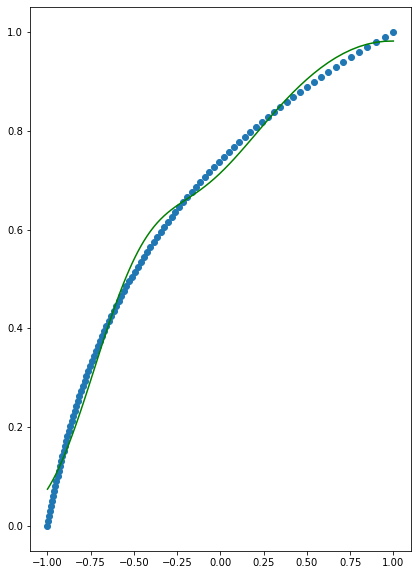

In [143]:
input_dim, output_dim = x.shape[1], y.shape[1]


nn = NeuralNetwork(cost_func = mse, learning_rate=1e-2)
nn.layers.append(Layer(input_dim=input_dim, output_dim= 10, activation = tanh))
nn.layers.append(Layer(input_dim=10, output_dim= output_dim, activation = linear))

nn.fit(x,y, epochs=3000, verbose= 300)

plt.figure(figsize = (15,10))
plt.subplot(1, 2, 1)
plt.scatter(x,y)
plt.plot(x, nn.predict(x), c="green")


#### C) f(x) = 10x⁵+ 5x⁴+ 2x³– 0.5x²+ 3x + 2,

In [288]:
x = np.linspace(0,1,100)
y = 10*x**5 + 5*x**4 + 2*x**3 - 0.5*x**2 + 3*x + 2 

minmax = MinMaxScaler(feature_range=(-1, 1))
x = minmax.fit_transform(x.reshape(-1,1).astype(np.float64))

# x = x.reshape(-1,1)
y = y.reshape(-1,1)
print(x.min(), x.max())

-1.0 1.0


epoch:    0/3000 loss_train: 111.44509306
epoch:  300/3000 loss_train: 1.10447472
epoch:  600/3000 loss_train: 0.58457904
epoch:  900/3000 loss_train: 0.38393338
epoch: 1200/3000 loss_train: 0.28040694
epoch: 1500/3000 loss_train: 0.21648250
epoch: 1800/3000 loss_train: 0.17294779
epoch: 2100/3000 loss_train: 0.14174090
epoch: 2400/3000 loss_train: 0.11837795
epoch: 2700/3000 loss_train: 0.10026467
epoch: 3000/3000 loss_train: 0.08585072


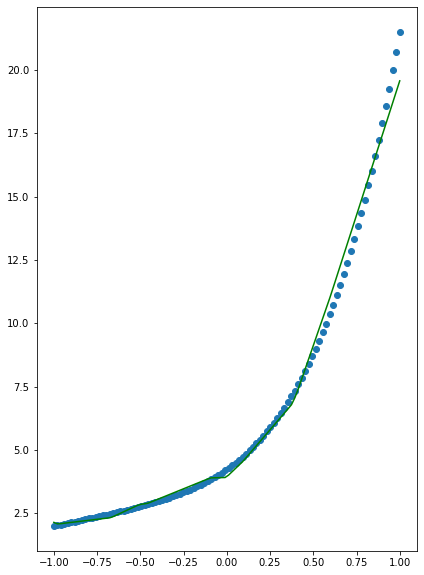

In [289]:
input_dim, output_dim = x.shape[1], y.shape[1]

nn = NeuralNetwork(cost_func = mse, learning_rate = 1e-3)
nn.layers.append(Layer(input_dim=input_dim, output_dim=12, activation=relu))
nn.layers.append(Layer(input_dim=12, output_dim=12, activation=relu))
nn.layers.append(Layer(input_dim=12, output_dim=output_dim, activation=linear))

nn.fit(x,y, epochs=3000, verbose=300)


plt.figure(figsize = (15,10))
plt.subplot(1, 2, 1)
plt.scatter(x,y)
plt.plot(x, nn.predict(x), c="green")


### Questão 3

In [469]:
def Generate_data_problem(n_exemplos):
    x = np.random.uniform(-1,1,n_exemplos)
    y = np.random.uniform(-1,1,n_exemplos)
    
    dados = pd.DataFrame(data={'x':[0.1], 'y': [0.1], 'Class': [1]})
    
    
    for i in range(n_exemplos):
        if ( y[i] <= 1 - x[i] and x[i] >= 0 and y[i] >= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],0]
            
        elif ( y[i] <= x[i] + 1 and x[i] <= 0 and y[i]>=0 ):
            dados.loc[len(dados)] = [x[i],y[i],1]
            
        elif ( y[i] >= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],2]
            
        elif ( y[i] >= x[i] - 1 and x[i] >= 0 and y[i] <= 0 ):
            dados.loc[len(dados)] = [x[i],y[i],3]
            
        elif ( y[i] >= 1 - x[i] and x[i] >= 0 and y[i] >= 0  and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],4]
            
        elif ( y[i] >= x[i] + 1 and x[i] <= 0 and y[i]>=0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],5]
            
        elif ( y[i] <= -x[i] - 1 and x[i] <= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],6]
            
        elif ( y[i] <= x[i] - 1 and x[i] >= 0 and y[i] <= 0 and x[i]**2 + y[i]**2 <=1 ):
            dados.loc[len(dados)] = [x[i],y[i],7]
            
            
    return dados

In [470]:
dados_gerados = Generate_data_problem(5000)

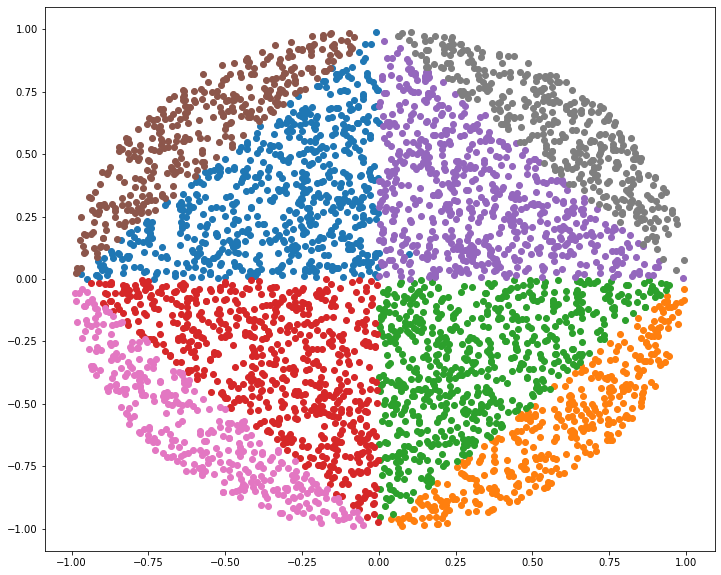

In [471]:
# classes = dados_gerados['y'].unique()

# figure = plt.figure(figsize=(20,10))
# axis = figure.add_subplot(111)

# for classe in classes:
#     valores =  dados_gerados[dados_gerados['y'] == classe].values
#     x = valores[:,0]
#     y = valores[:,1]
#     axis.scatter(x,y, label=classe)
    
    
classes = dados_gerados['Class'].unique()
    
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

for classe in classes:
    valores = dados_gerados[dados_gerados['Class'] == classe].values
    x,y = valores[:,0] , valores[:,1]
    ax.scatter(x,y, label=classe)

In [481]:
X_train, X_test, y_train, y_test = train_test_split(dados_gerados[['x','y']].values,dados_gerados[['Class']].values, test_size=0.3)


In [482]:
one = OneHotEncoder(sparse=False)

y_train = one.fit_transform(y_train.reshape(-1,1))
y_train


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [483]:
input_dim, output_dim = X_train.shape[1], y_train.shape[1]

nn = NeuralNetwork(cost_func = softmax_neg_log_likelihood, learning_rate = 1e-1)

nn.layers.append(Layer(input_dim=input_dim, output_dim=10, activation= tanh))
nn.layers.append(Layer(input_dim=10, output_dim=10, activation= relu))
nn.layers.append(Layer(input_dim=10, output_dim=output_dim, activation= linear))

nn.fit(X_train,y_train, epochs=3000, verbose=300)

y_pred = nn.predict(X_test)

epoch:    0/3000 loss_train: 4.45702567
epoch:  300/3000 loss_train: 0.37088629
epoch:  600/3000 loss_train: 0.22998560
epoch:  900/3000 loss_train: 0.17738157
epoch: 1200/3000 loss_train: 0.14835129
epoch: 1500/3000 loss_train: 0.12898089
epoch: 1800/3000 loss_train: 0.11506457
epoch: 2100/3000 loss_train: 0.10439405
epoch: 2400/3000 loss_train: 0.09589342
epoch: 2700/3000 loss_train: 0.08884555
epoch: 3000/3000 loss_train: 0.08293640


In [484]:
for i in range(len(y_pred)):
    for j in range(len(y_pred[i])):
        
        if np.argmax(y_pred[i]) == j:
            
            y_pred[i][j] = 1
        else:
            y_pred[i][j] = 0

In [485]:
pred = np.argmax(y_pred, axis=1)

print('Reporte: ')
print(classification_report(y_test,pred))
print('Matriz de Confusão: \n')
print(confusion_matrix(y_test,pred))

Reporte: 
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       182
         1.0       0.98      0.97      0.98       193
         2.0       0.99      0.97      0.98       194
         3.0       0.98      0.98      0.98       199
         4.0       0.98      0.97      0.98       126
         5.0       0.96      0.99      0.98       102
         6.0       0.97      0.99      0.98        98
         7.0       0.98      0.99      0.98        96

    accuracy                           0.98      1190
   macro avg       0.98      0.98      0.98      1190
weighted avg       0.98      0.98      0.98      1190

Matriz de Confusão: 

[[178   2   0   0   2   0   0   0]
 [  1 188   0   0   0   4   0   0]
 [  0   0 189   2   0   0   3   0]
 [  0   0   1 196   0   0   0   2]
 [  4   0   0   0 122   0   0   0]
 [  0   1   0   0   0 101   0   0]
 [  0   0   1   0   0   0  97   0]
 [  0   0   0   1   0   0   0  95]]


In [502]:
y_pred = nn.predict(X_test[0])
np.argmax(y_pred)

3

In [503]:
X_test[0]

array([ 0.43514965, -0.2175382 ])